In [ ]:
import tensorflow as tf

# 데이터 세트

## MNIST

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"이미지 개수 : {len(x_train)}")
print(f"라벨 개수 : {len(y_train)}")

이미지 개수 : 60000
라벨 개수 : 60000


### 이미지

In [ ]:
x_train[0].shape # 0번째의 모양

(28, 28)

In [ ]:
x_train[0] # 28X28 의 이미지지 값은 0~255까지의 정수

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt

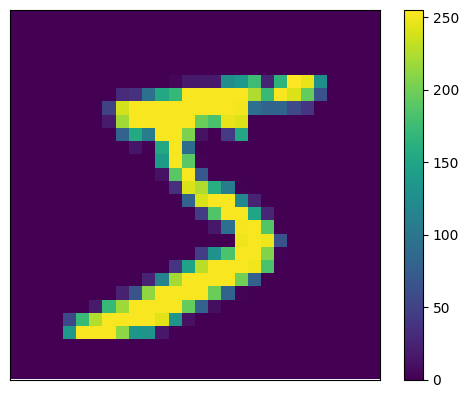

In [ ]:
plt.figure()
plt.imshow(x_train[0])#, cmap=plt.cm.binary.reversed())
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### 라벨

In [ ]:
y_train[0] # 숫자 이미지가 5이다.

5

### 한꺼번에 보기

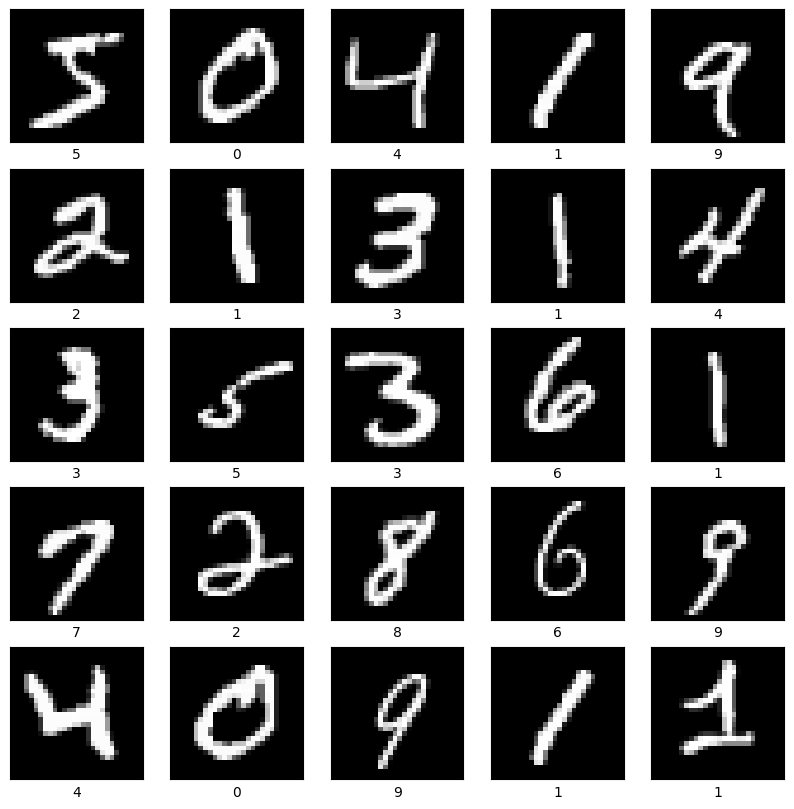

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    # 이미지 출력
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary.reversed())
    # 라벨 출력
    plt.xlabel(y_train[i])
plt.show()

## 간단한 분류기

### 데이터 전처리

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 모델

In [ ]:
layers = tf.keras.layers

In [ ]:
models = tf.keras.models

In [ ]:
def mnist_model(image_size=(28, 28)):
  input_1 = layers.Input(image_size, name="input_1")
  flatten_1 = layers.Flatten(name="flatten_1")(input_1)
  dense_1 = layers.Dense(10, name="dense_1")(flatten_1)
  softmax_1 = layers.Softmax(name="softmax_1")(dense_1)

  return models.Model(inputs=[input_1], outputs=[softmax_1])

In [ ]:
model = mnist_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_weights = model.weights

In [ ]:
model_weights

[<tf.Variable 'dense_1/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 6.6280819e-02, -3.7481274e-02,  6.7047738e-02, ...,
         -6.8904541e-02,  5.5765510e-03,  1.8501818e-02],
        [ 3.0053169e-02, -3.2932460e-02, -2.6218593e-05, ...,
         -8.5868835e-02,  1.9864418e-02,  4.3807678e-02],
        [ 7.9314895e-02, -6.1731689e-02, -2.1576762e-02, ...,
         -9.7530335e-03,  5.2020587e-02,  7.3019721e-02],
        ...,
        [ 1.8009216e-02, -6.9810621e-02,  2.0598680e-02, ...,
          6.7811459e-04, -7.5858742e-02,  7.7881142e-03],
        [-4.0567823e-02,  7.7941261e-02, -8.9805722e-03, ...,
         -6.3844204e-02, -7.3292159e-02, -6.4833060e-02],
        [ 1.7928049e-02,  7.3373131e-02, -2.8506294e-03, ...,
         -7.4543275e-02,  2.5421403e-02, -4.7494460e-02]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## (트레이닝 전) 테스트

In [ ]:
model.evaluate(x_test, y_test) ## accuracy * 100이 확률

313/313 [==============================] - 4s 2ms/step - loss: 2.4144 - accuracy: 0.0818


[2.414421319961548, 0.08179999887943268]

## 트레이닝

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4707 - accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9281
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2584 - accuracy: 0.9280
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.250

## (트레이닝 후) 테스트

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9262


[0.2627851366996765, 0.9261999726295471]

# 저장 및 불러오기

## 저장

In [ ]:
model.save_weights("mnist_weights")

## 새로운 모델 만들기

In [ ]:
model = mnist_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.3680 - accuracy: 0.0945


[2.3679988384246826, 0.09449999779462814]

## 불러오기

In [ ]:
model.load_weights("mnist_weights")

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9262


[0.2627851366996765, 0.9261999726295471]

# 구글 드라이브 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save_weights("/content/drive/MyDrive/_dl/mmsit_weights")

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 = mnist_model((256,256))
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256)]        0         
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                655370    
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 655,370
Trainable params: 655,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3 = mnist_model((512,512))

In [ ]:
model_3.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512)]        0         
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                2621450   
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 2,621,450
Trainable params: 2,621,450
Non-trainable params: 0
_________________________________________________________________
